In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import requests

In [ ]:
def send_data_to_api(api_endpoint, diff_x, diff_y):
  # format of the data, id will automatically be assigned within the API
  data = {
      "diff_x": diff_x,
      "diff_y": diff_y
  }

  # obtain response after posting to see if process was successful
  response = requests.post(api_endpoint, data)

  if response.status_code == 200:
        print("Data sent successfully")
  else:
    print(f"Failed to send data. Status code: {response.status_code}, Response: {response.text}")

In [ ]:
# obtain the current x and y coordinates of the object with moments, and then return it as a tuple
def detect_object():
  pass

In [ ]:
# Mount tripod and connect to computer
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

prev_x, prev_y = None, None
curr_x, curr_y = None, None

API_ENDPOINT = "placeholder"

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    curr_x, curr_y = detect_object(frame)

    # first time data is sent
    if (prev_x and prev_y) and (prev_x != curr_x) and (prev_y != curr_y):
      diff_x, diff_y = curr_x-prev_x, curr_y-prev_y
      send_data_to_api(API_ENDPOINT, diff_x, diff_y)
      break

    prev_x, prev_y = curr_x, curr_y

    # Set the first frame to be (0, 0, 0) origin within the VR, and then for every two frames get the difference in coords and then find the relative change in position, and then show that change within the VR headset

    # cv2.imshow('Frame', img)

    # Break the loop with 'q'
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

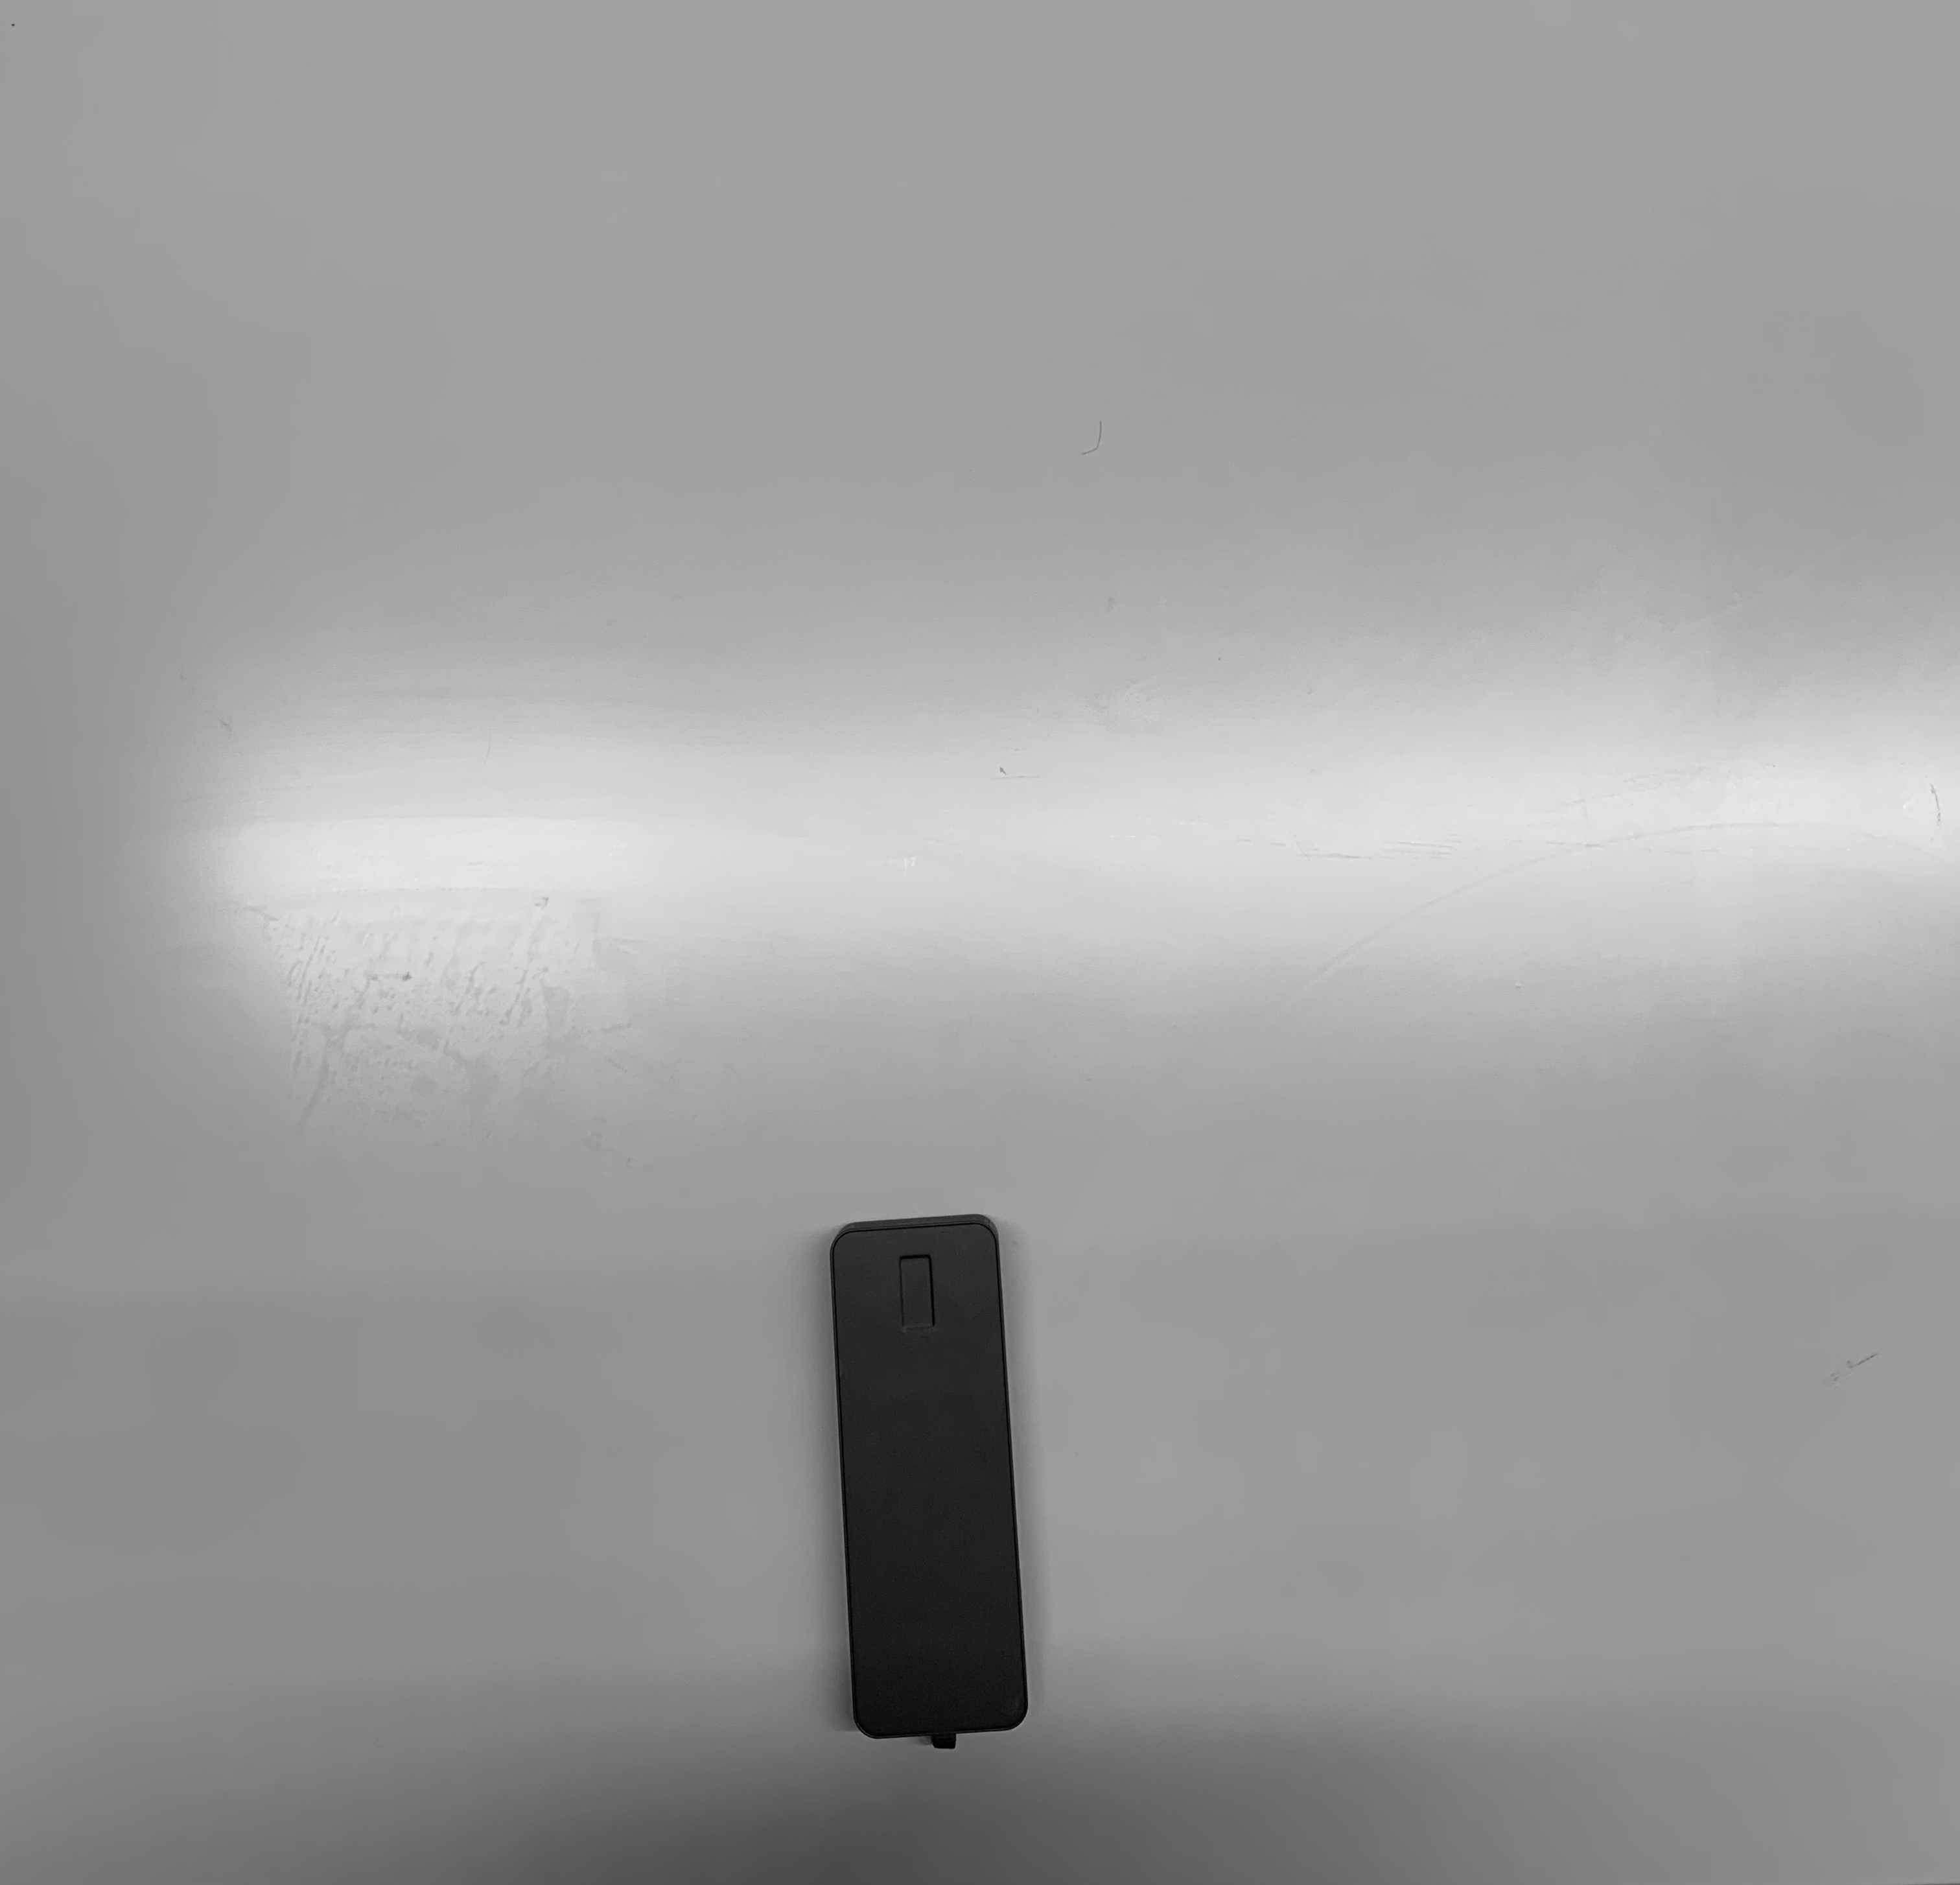

In [ ]:
img = cv2.imread("IMG_5463.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

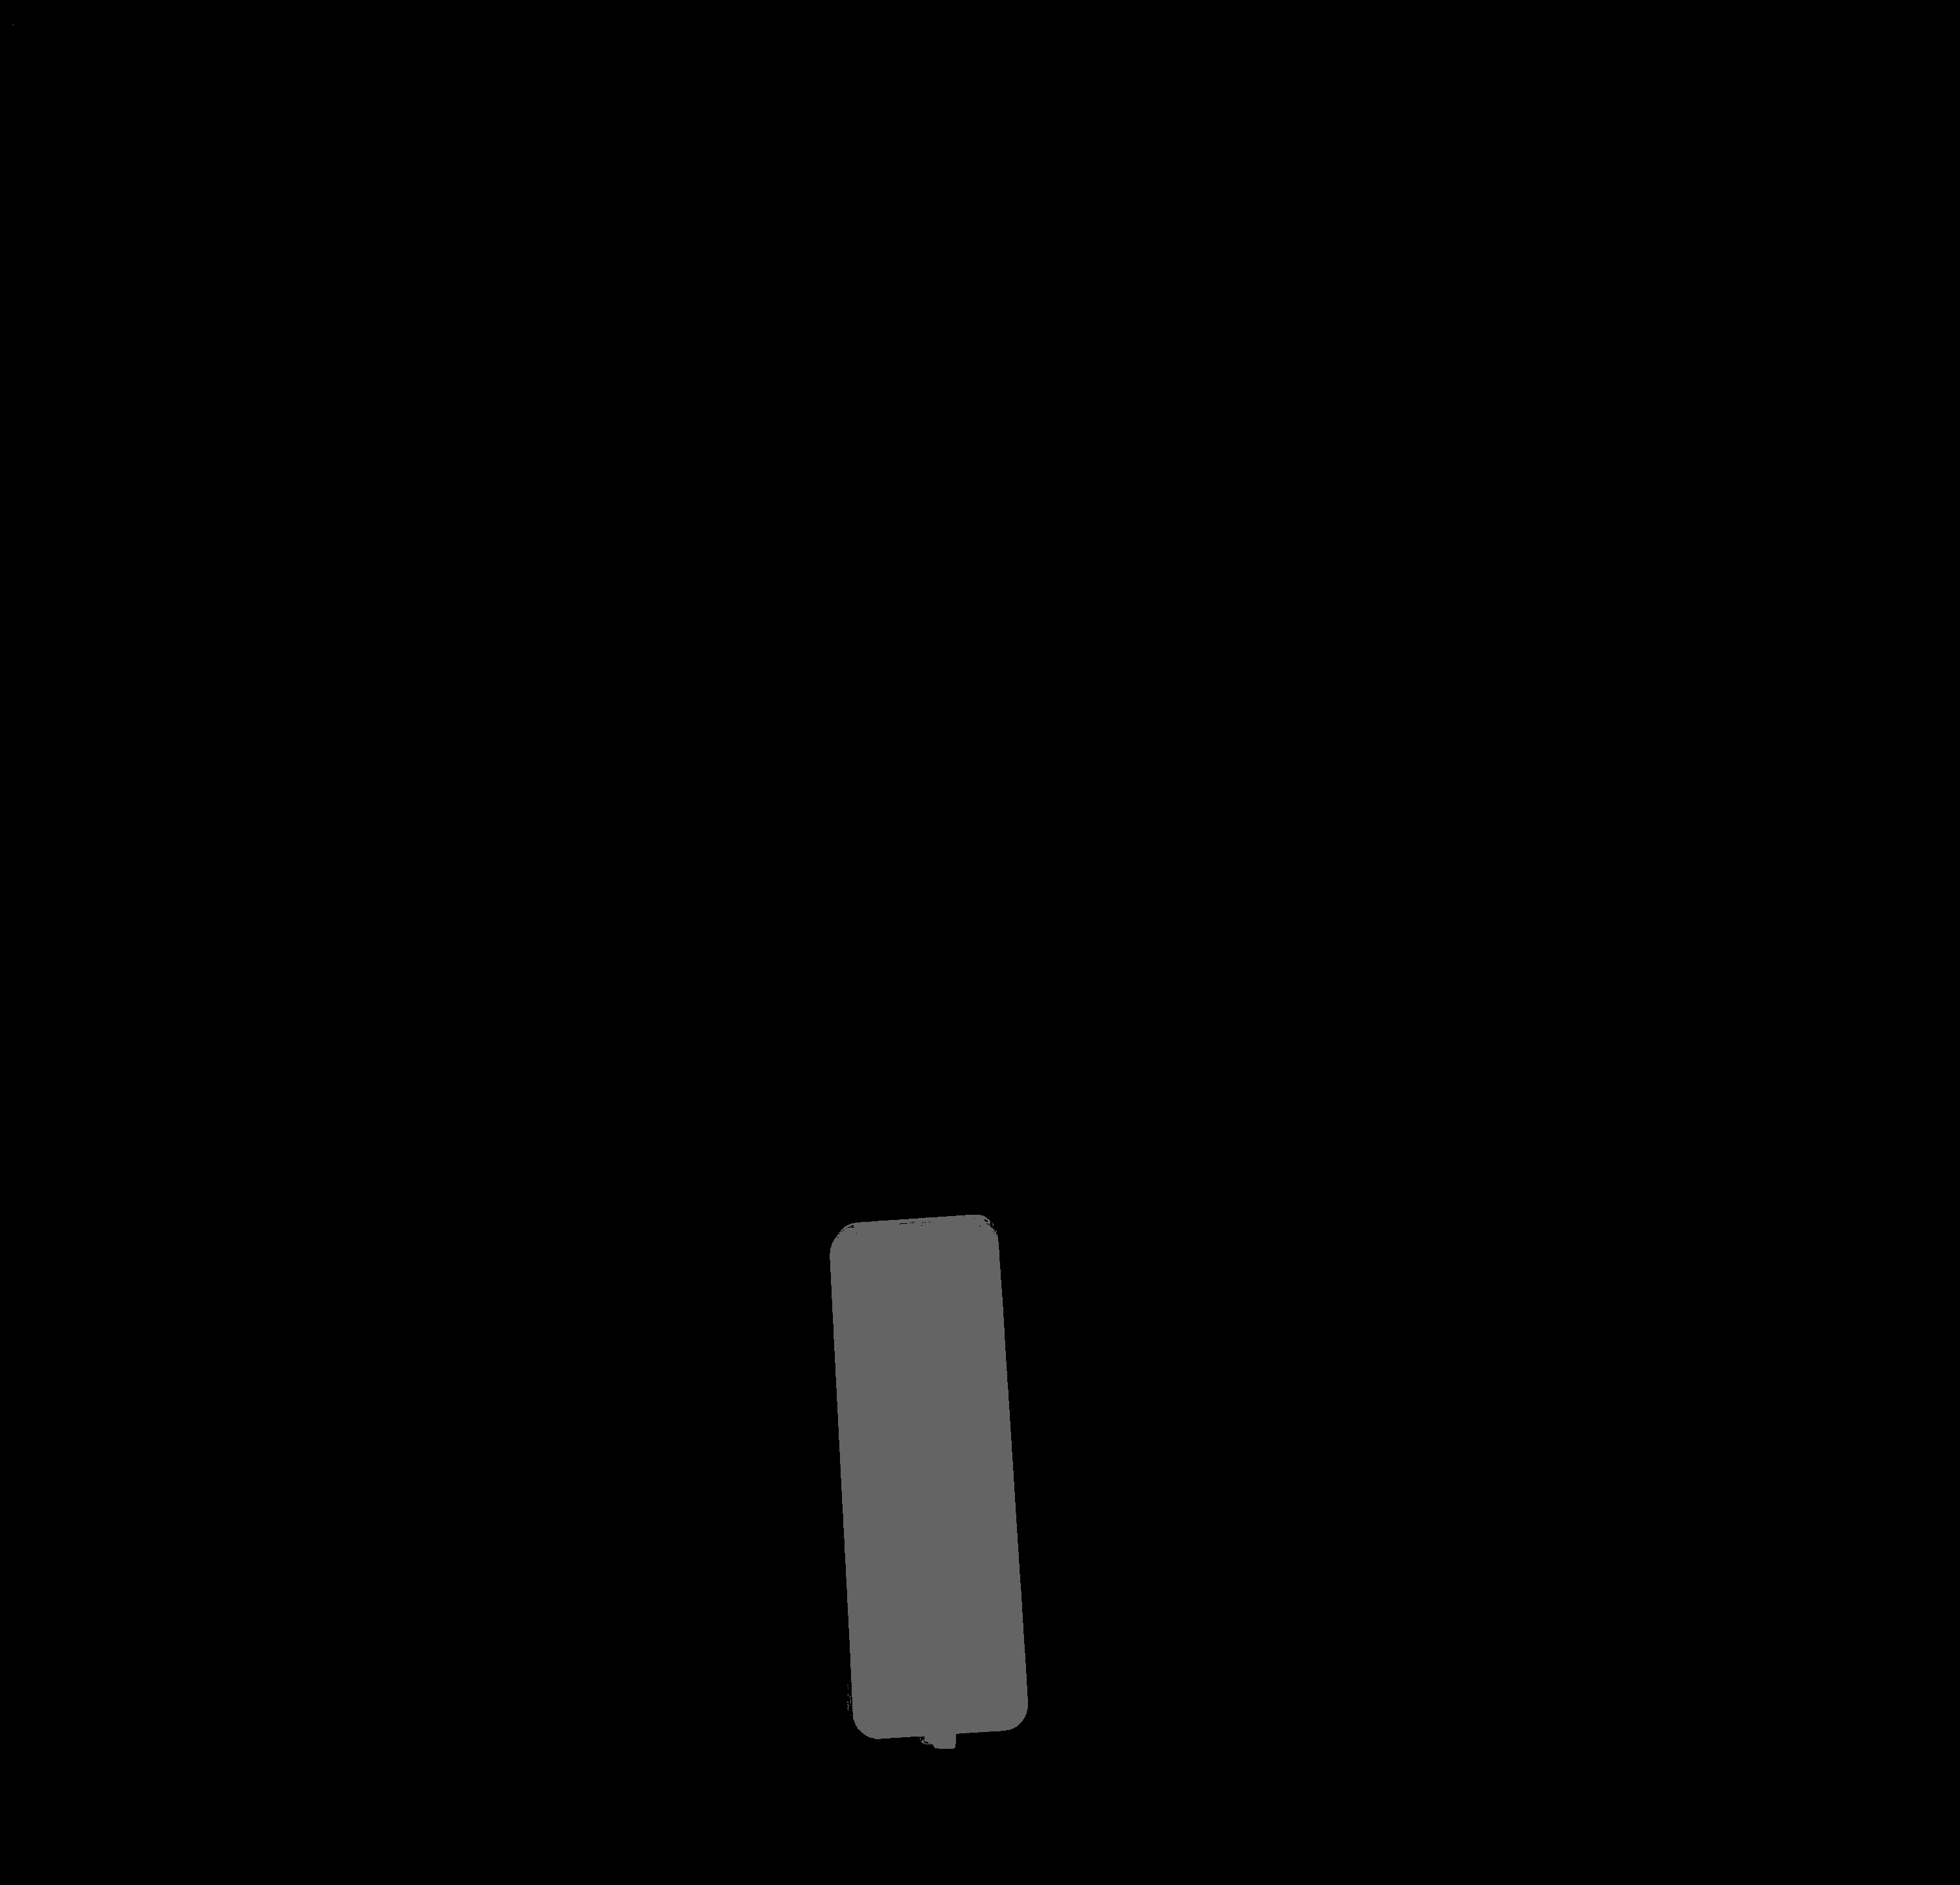

In [ ]:
_, binary_image = cv2.threshold(gray_image, 65, 100, cv2.THRESH_BINARY_INV)
cv2_imshow(binary_image)

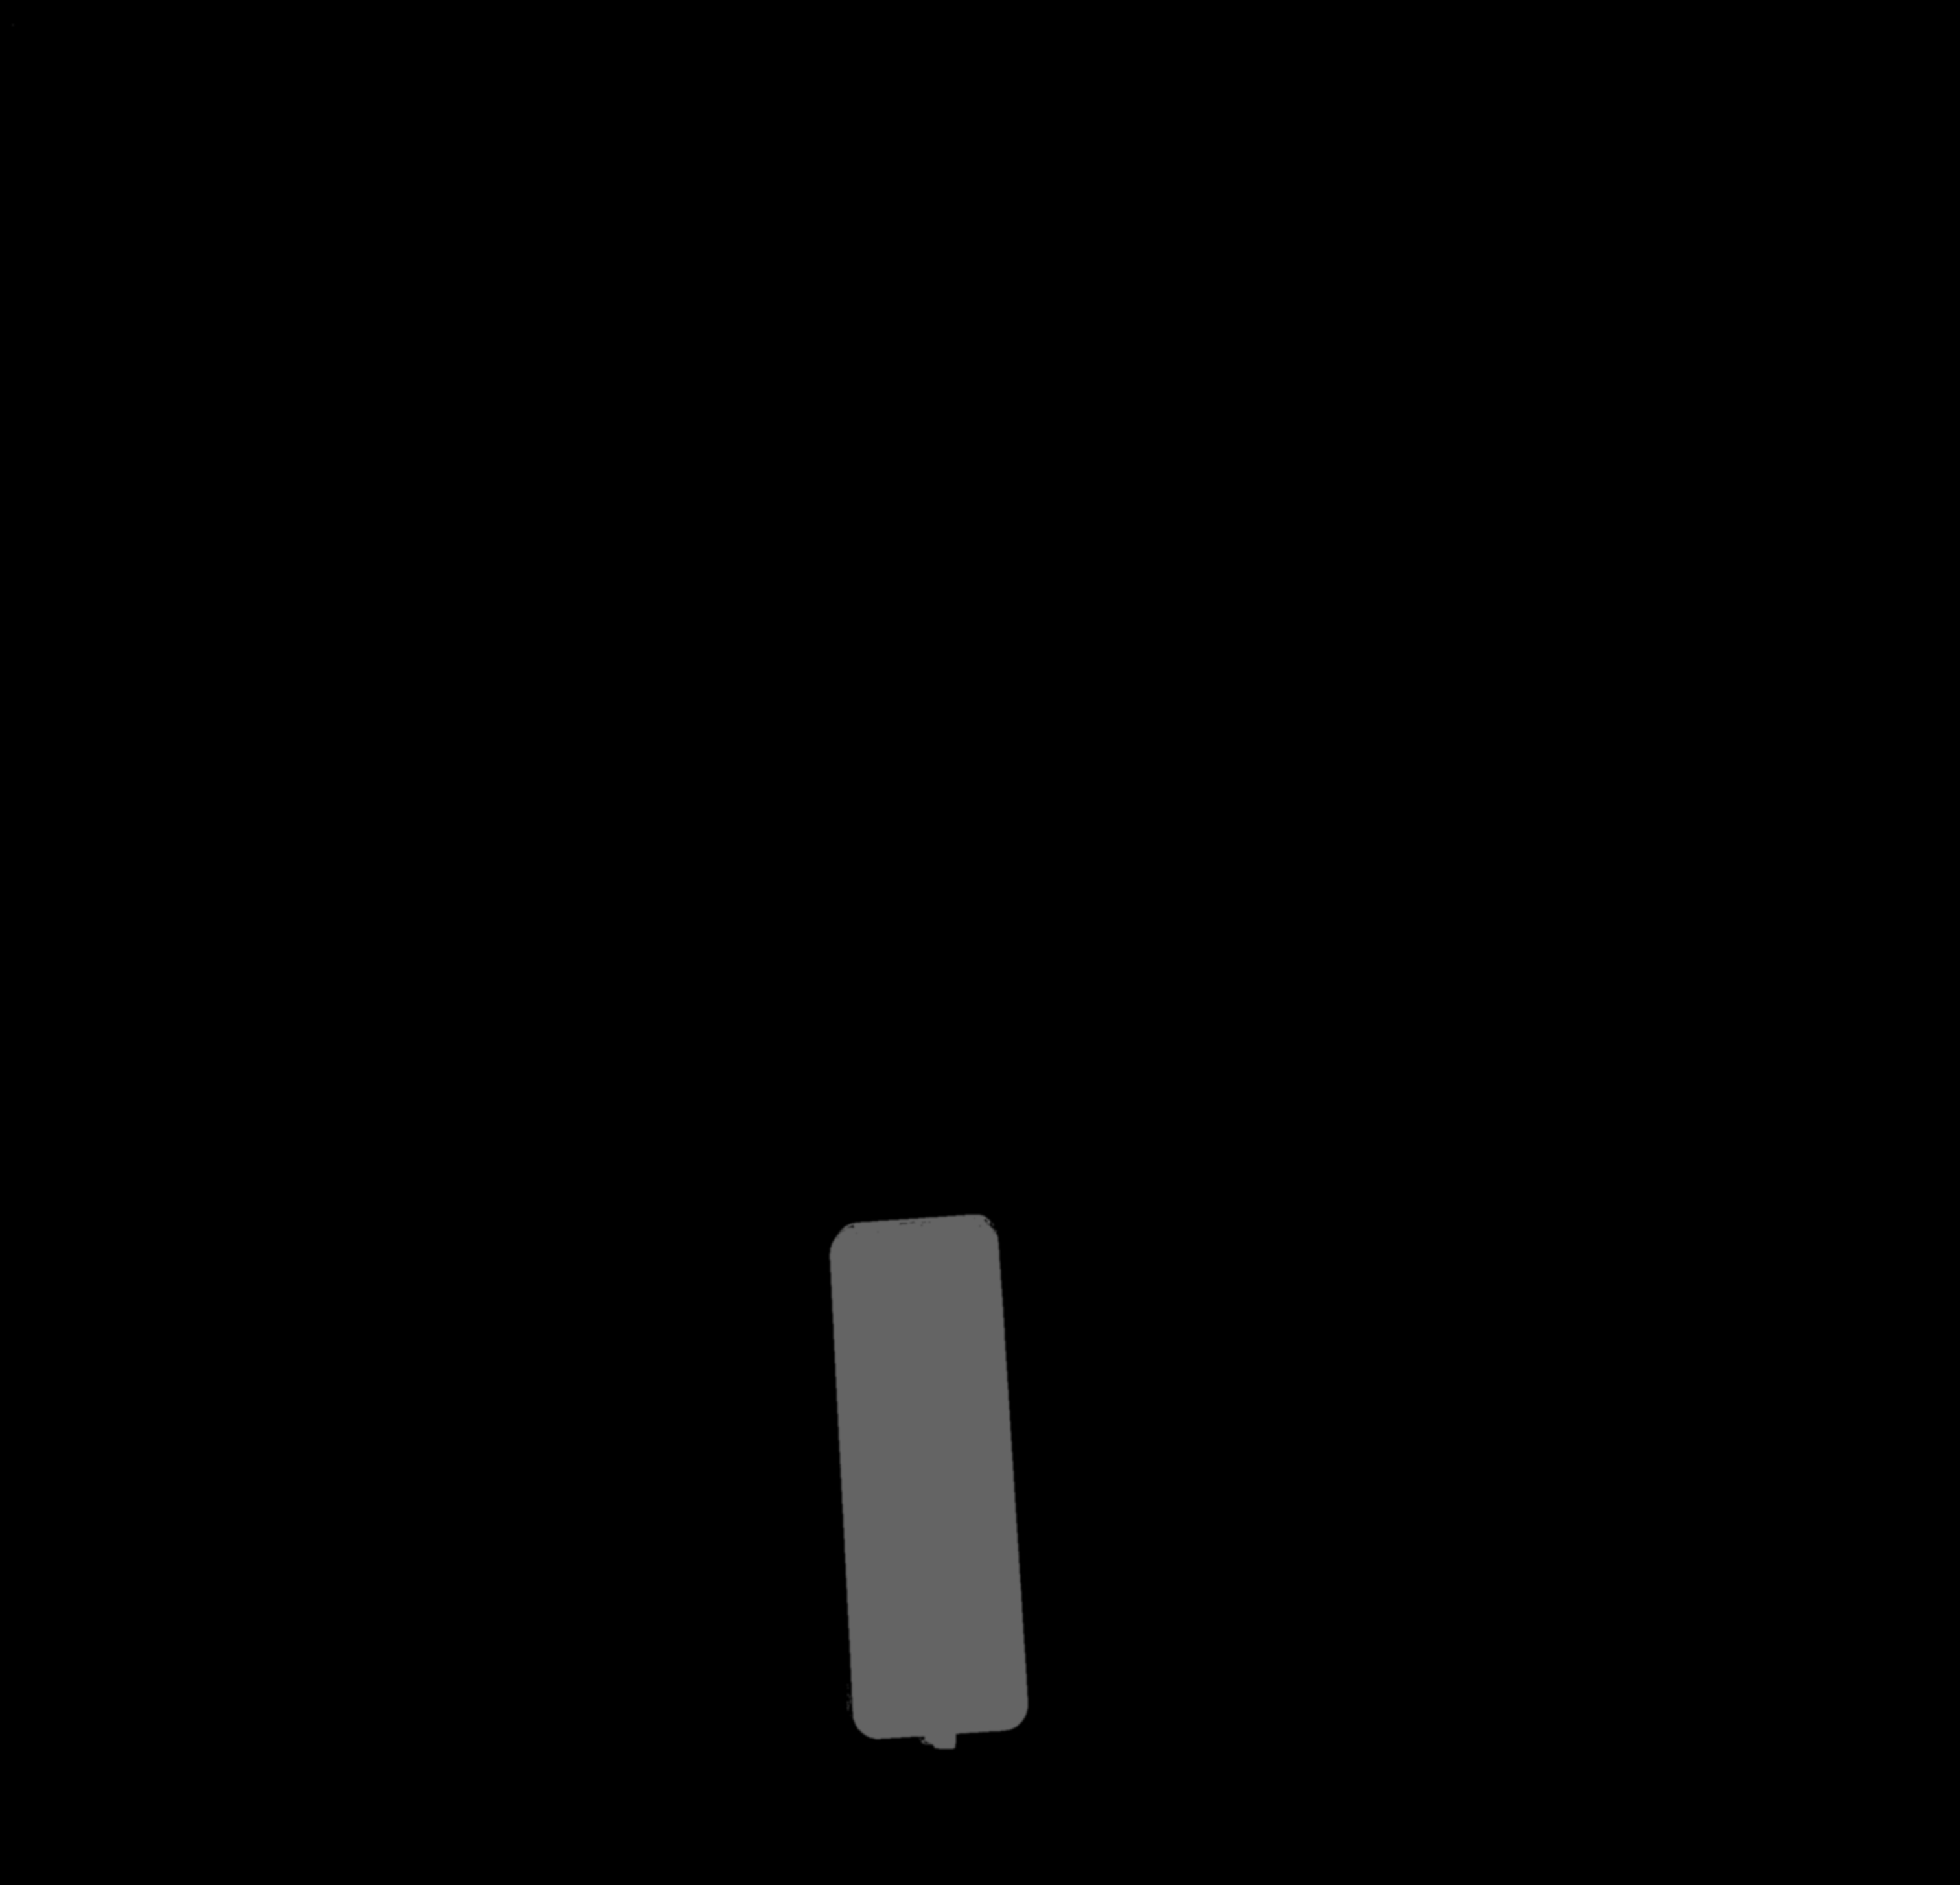

In [ ]:
blurred = cv2.GaussianBlur(binary_image, (7, 7), 0)
cv2_imshow(blurred)

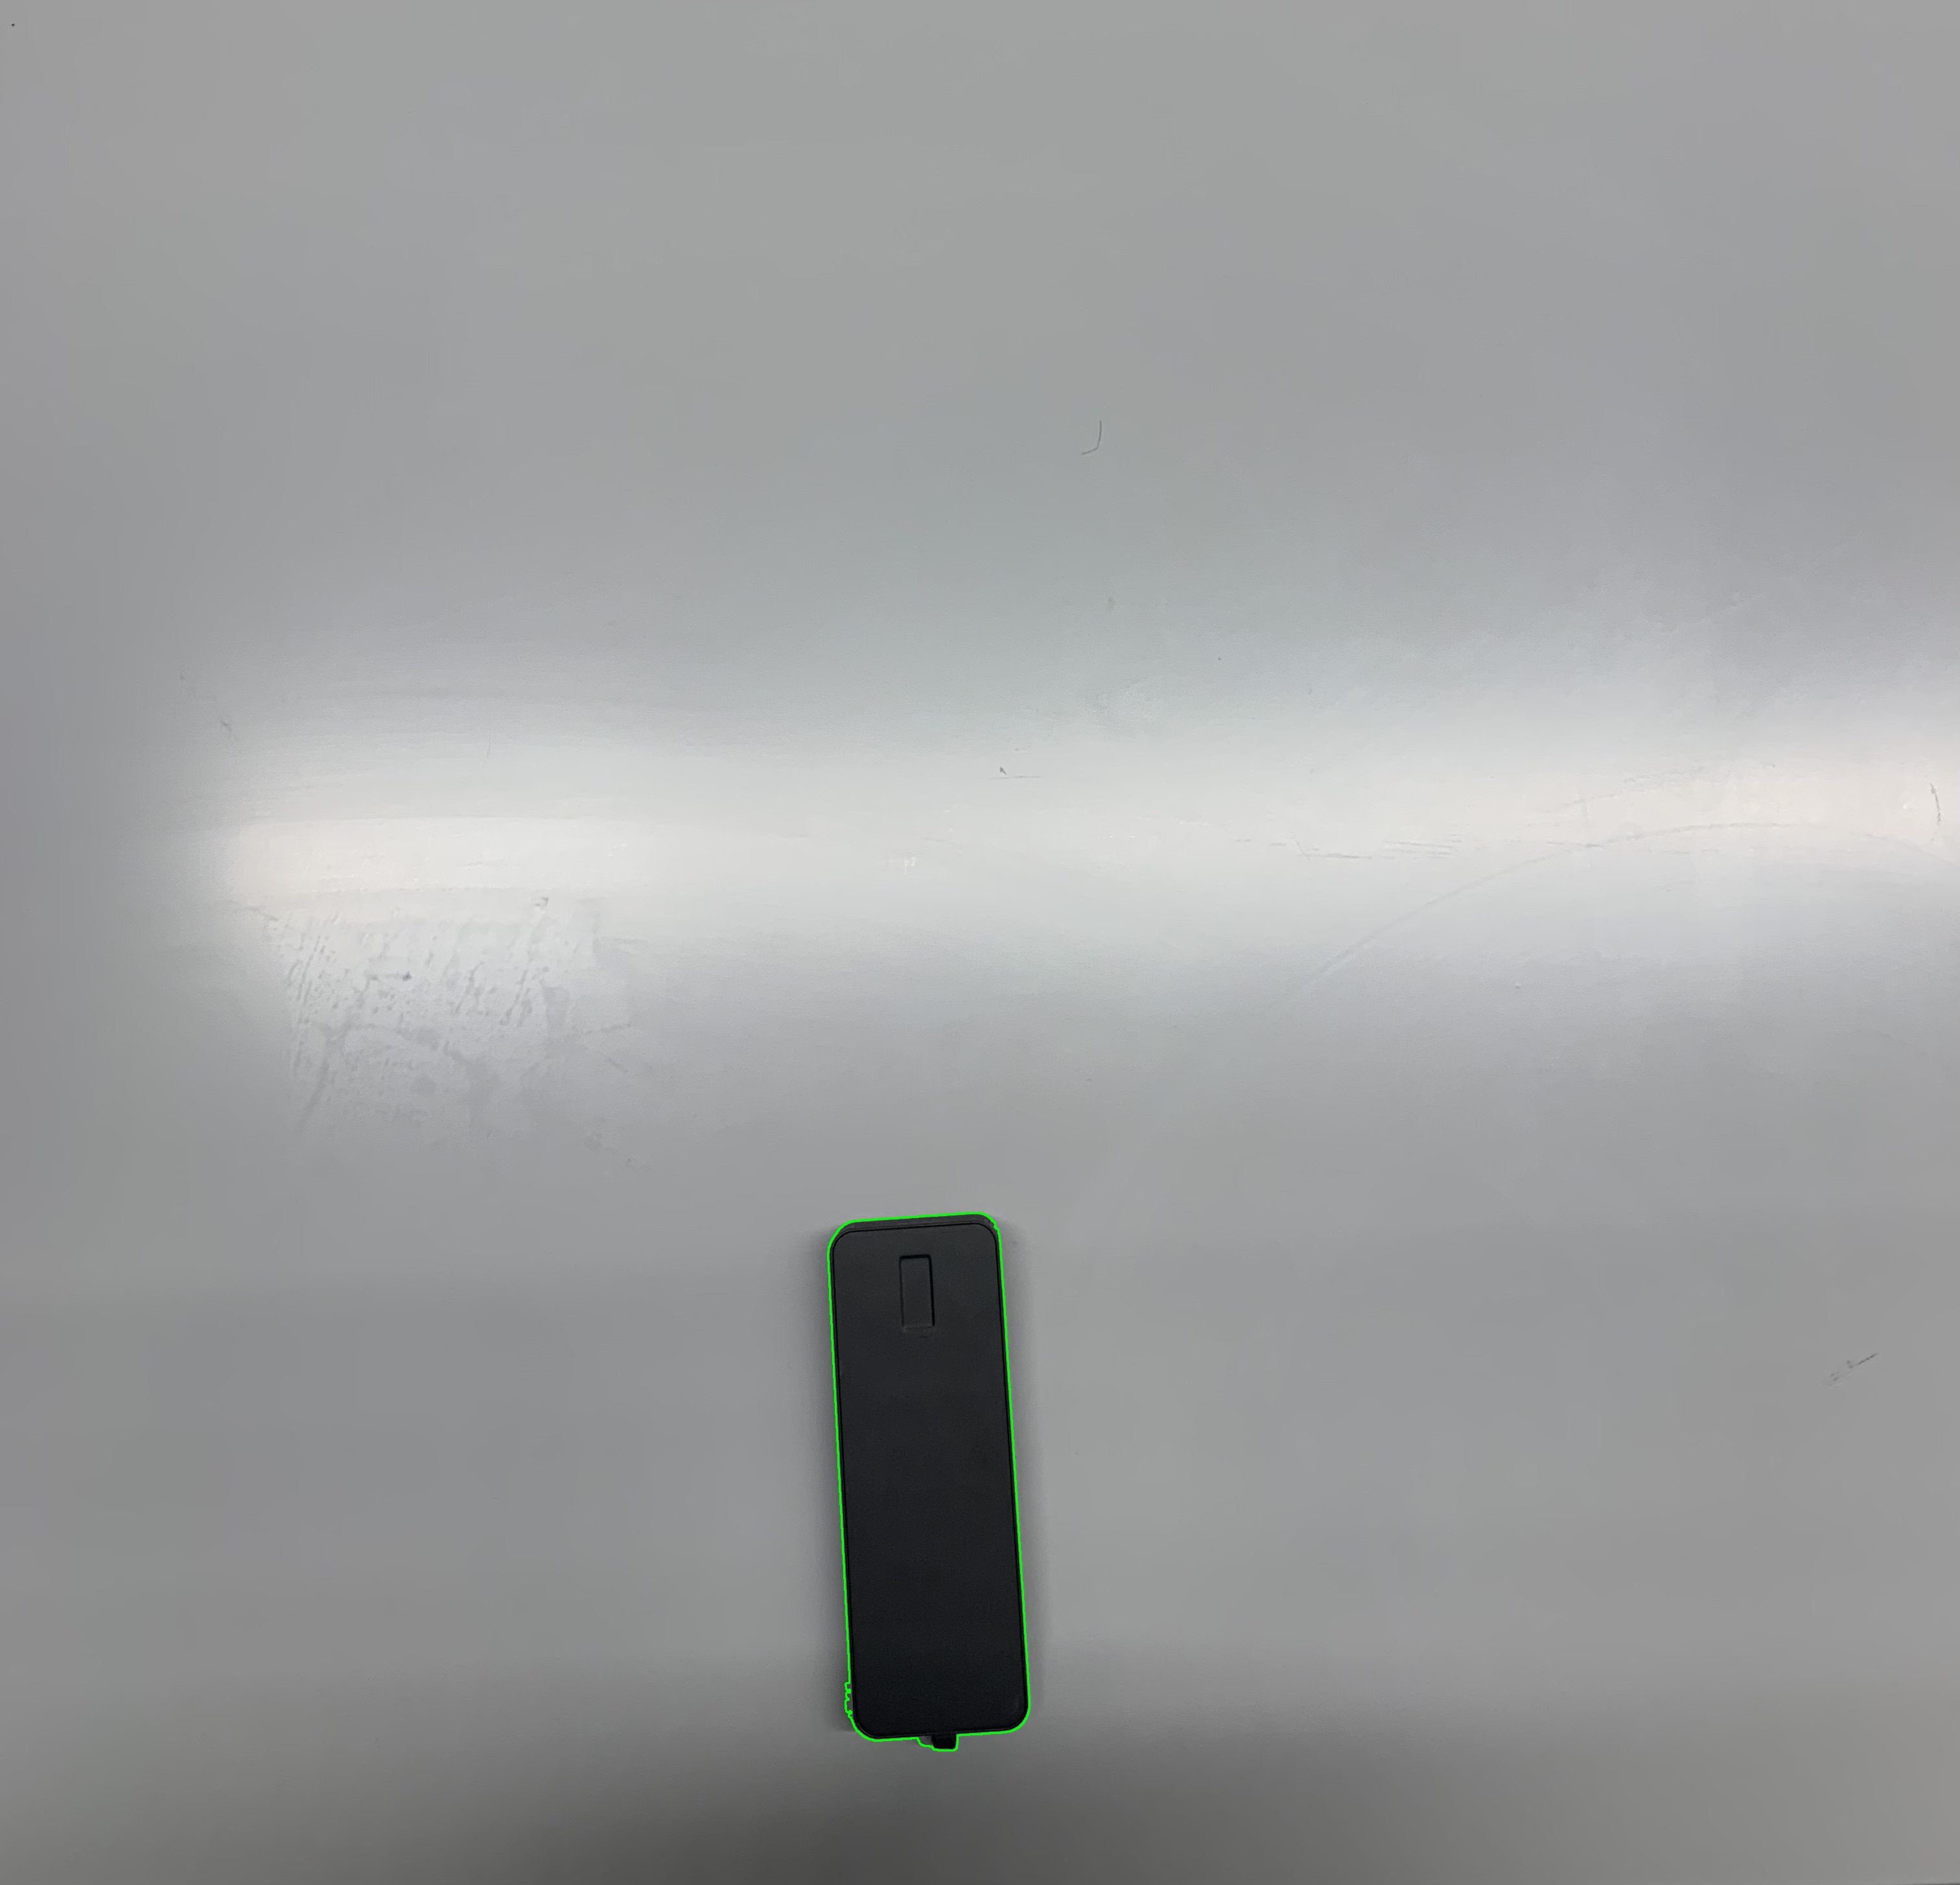

In [ ]:
contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 2)
cv2_imshow(img)

In [ ]:
M = cv2.moments(largest_contour)
# Center is based on pixels where top left corner is (0, 0) of a 2d xy-axis
if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
else:
    cX, cY = 0, 0
print(cX, cY)

1430 2283


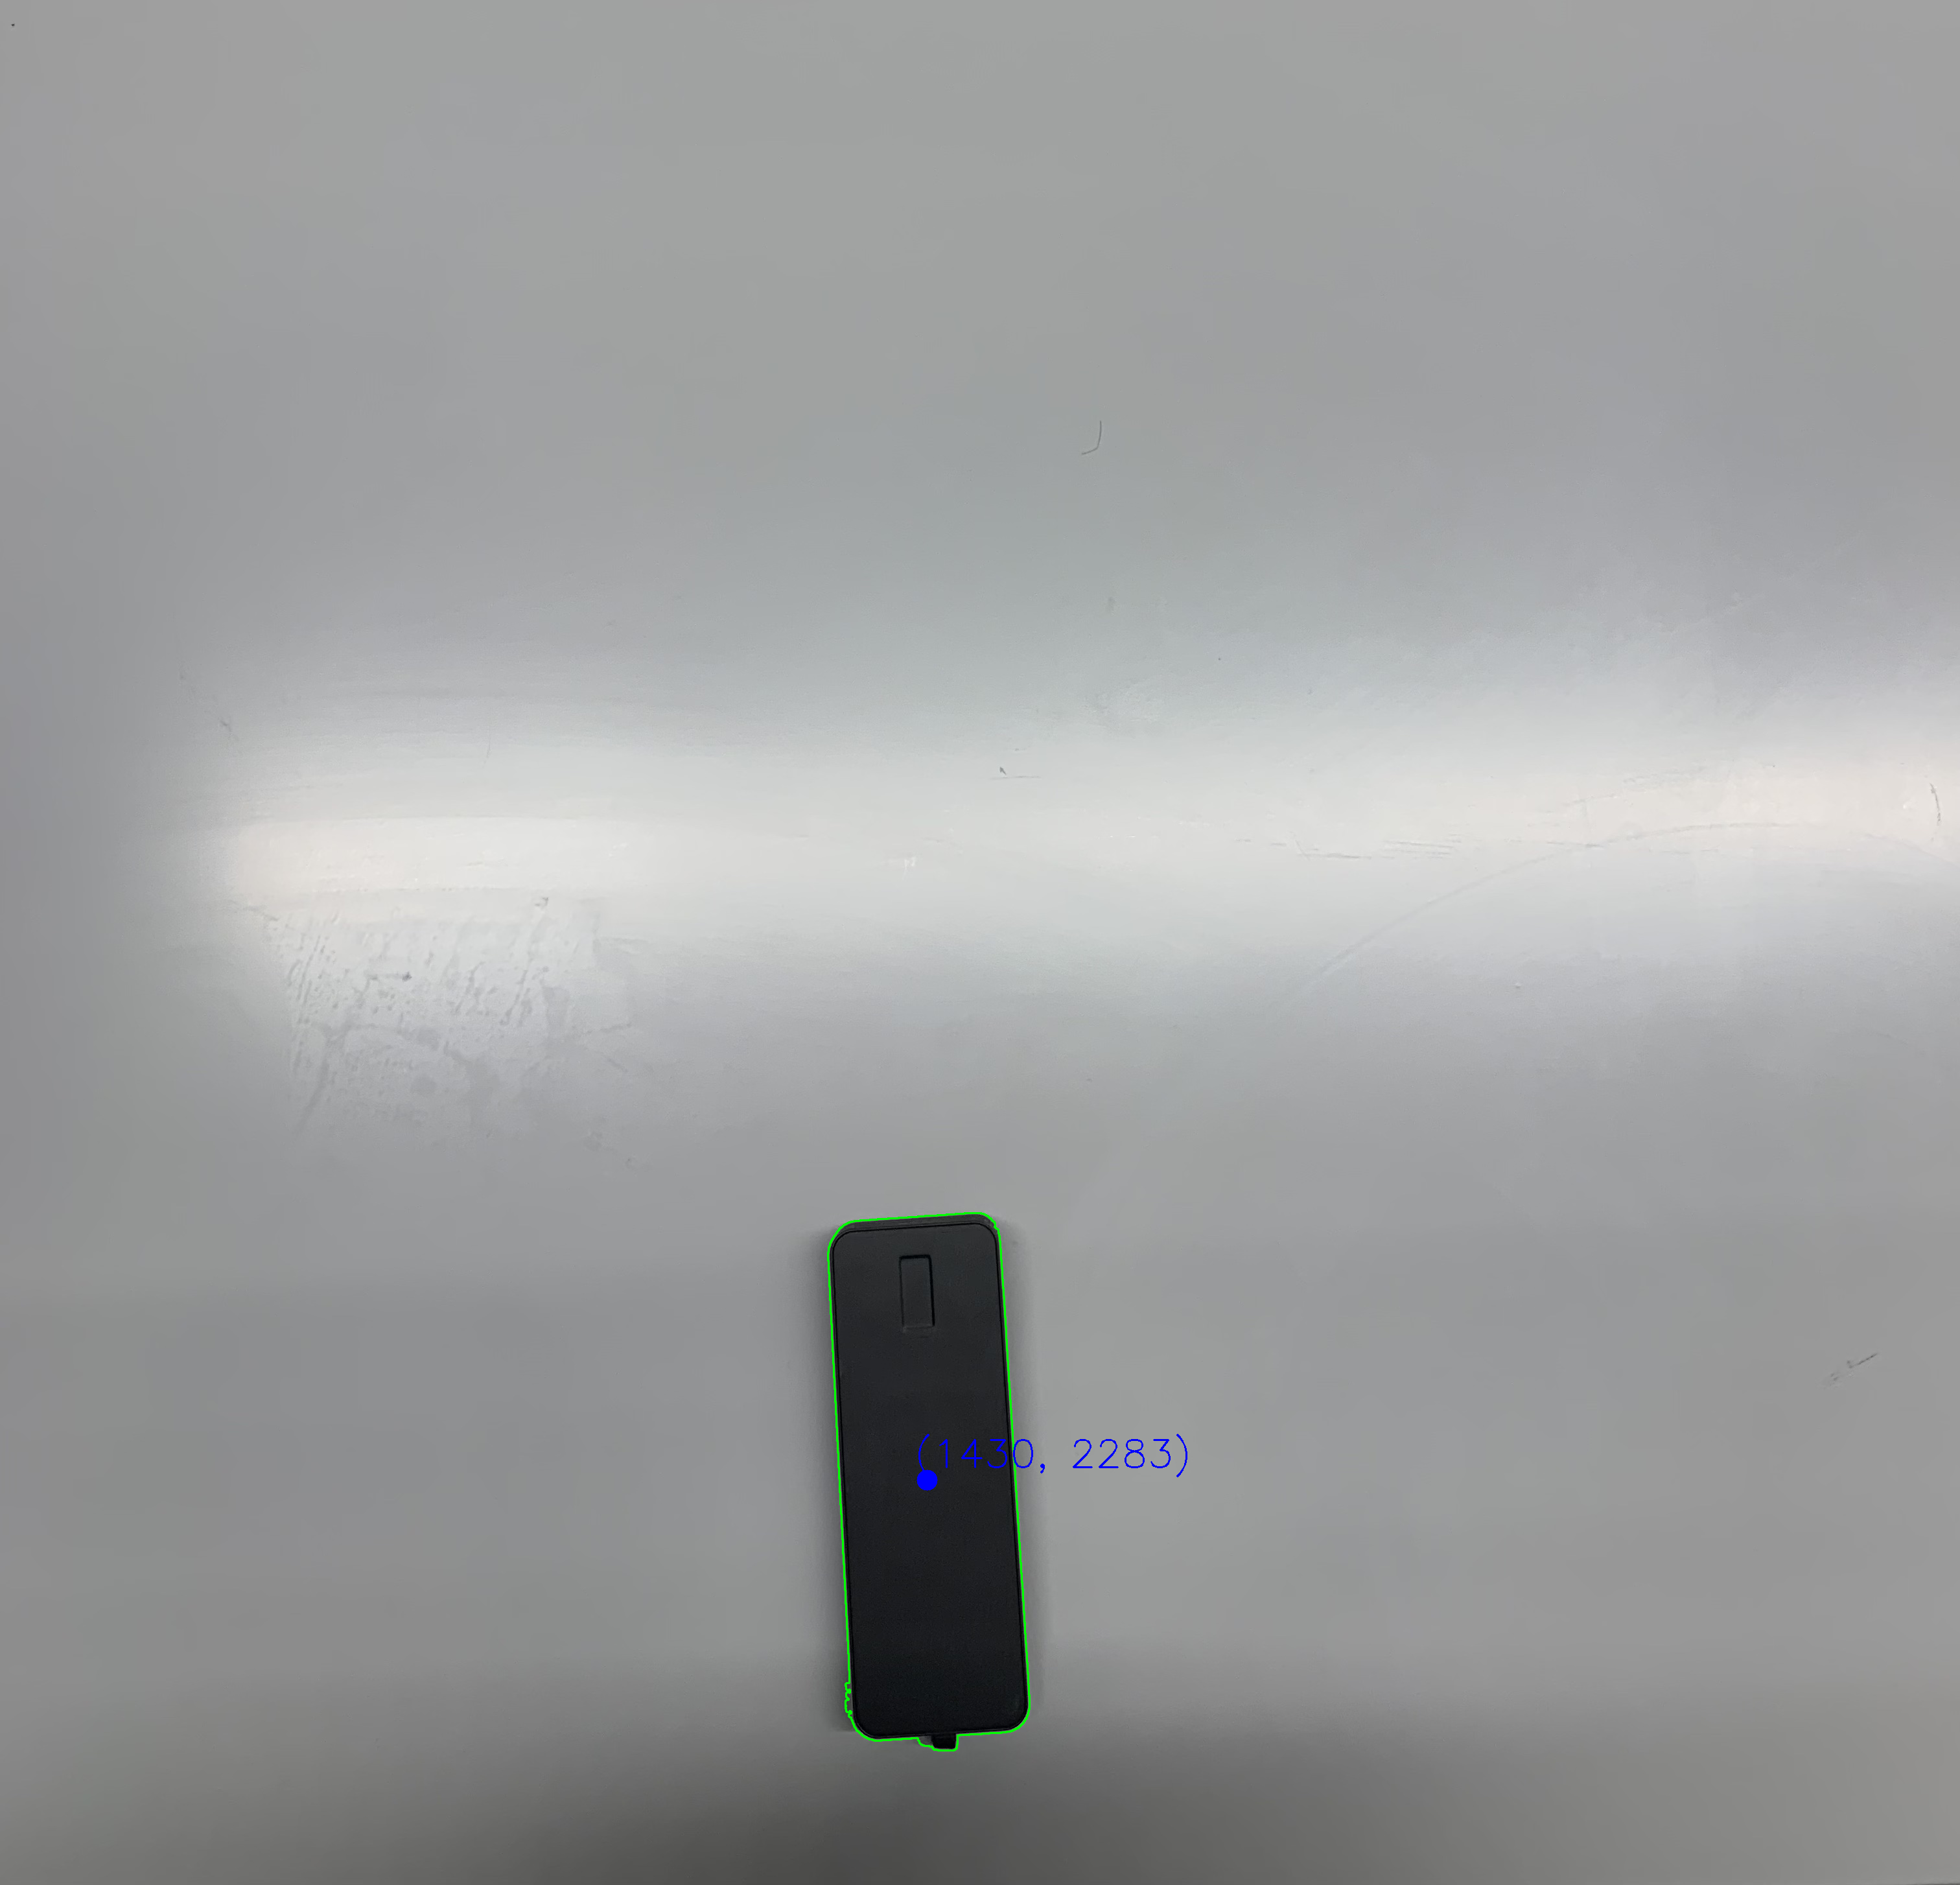

In [ ]:
cv2.circle(img, (cX, cY), 16, (255, 0, 0), -1)
cv2.putText(img, f"({cX}, {cY})", (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)
cv2_imshow(img)